# EV Analysis
#### 1. Data Exploration and Descriptive Statistics
- Data Cleaning
#### 2. Statistical Analysis and Inference
- Hypothesis tests
-- One-sample and two-sample t-tests
-- Analysis of Variance (ANOVA)
#### 3. Exploratory Data Analysis
- Univariate, Bivariate Analysis
#### 4. Modelling
- Non-linear Regression
- Random Forest Regression
- Decision Tree Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#### 1. Data Exploration and Descriptive Statistics

In [2]:
data = pd.read_csv('datasets/Electric_Vehicle_Population_Data.csv')
# data = pd.read_csv('datasets/ElectricCarData_Clean.csv')
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10


In [3]:
data = data[['Model Year', 'Make', 'Model', 'Electric Range', 'Base MSRP', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Legislative District', 'Electric Utility']]
data.head(3)

,Model Year,Make,Model,Electric Range,Base MSRP,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Legislative District,Electric Utility
0,2019,TESLA,MODEL 3,220.0,0.0,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,22.0,PUGET SOUND ENERGY INC
1,2022,NISSAN,LEAF,0.0,0.0,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,10.0,PUGET SOUND ENERGY INC
2,2020,TESLA,MODEL 3,266.0,0.0,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,44.0,PUGET SOUND ENERGY INC


In [4]:
data.shape, data.size

((135038, 9), 1215342)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 9 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Model Year                                         135038 non-null  int64  
 1   Make                                               135038 non-null  object 
 2   Model                                              134789 non-null  object 
 3   Electric Range                                     135037 non-null  float64
 4   Base MSRP                                          135037 non-null  float64
 5   Electric Vehicle Type                              135038 non-null  object 
 6   Clean Alternative Fuel Vehicle (CAFV) Eligibility  135038 non-null  object 
 7   Legislative District                               134726 non-null  float64
 8   Electric Utility                                   135030 non-null  object 

In [7]:
data.isna().sum()

Model Year                                             0
Make                                                   0
Model                                                249
Electric Range                                         1
Base MSRP                                              1
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Legislative District                                 312
Electric Utility                                       8
dtype: int64

In [8]:
data[data['Base MSRP']==0].shape

(131612, 9)

In [9]:
# data[data['Make']==np.NaN]
data.isna().sum()

Model Year                                             0
Make                                                   0
Model                                                249
Electric Range                                         1
Base MSRP                                              1
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Legislative District                                 312
Electric Utility                                       8
dtype: int64

#### Data cleaning

In [5]:
print(data.shape)
data.dropna(inplace=True)
data = data[data['Base MSRP'] != 0]
print(data.shape)

(135038, 9)
(3419, 9)


In [11]:
data.describe()

,Model Year,Electric Range,Base MSRP,Legislative District
count,3419.000000,3419.000000,3419.000000,3419.000000
mean,2015.558058,123.516525,57085.415326,30.623867
std,2.462310,89.336377,22775.987782,14.529386
min,2008.000000,12.000000,31950.000000,1.000000
25%,2013.000000,17.000000,39995.000000,21.000000
50%,2016.000000,93.000000,59900.000000,35.000000
75%,2018.000000,208.000000,69900.000000,43.000000
max,2020.000000,265.000000,845000.000000,49.000000


### 2. Statistical Analysis and Inference

#### One sample t-test
- Null Hypothesis: $\bar{x}$ = $\mu$
- Alternative Hypothesis: $\bar{x}$ $\neq$ $\mu$
- $\alpha$=0.05

In [6]:
import scipy.stats as st

df_ttest = pd.DataFrame(columns=['Make', 'Population mean', 'sample mean', 't-stat', 'p-val', 'CI lower', 'CI upper'])

def one_sample_test(MU, sample, alpha = 0.05):
    t_stat, p_value = st.ttest_1samp(sample, MU)

    if p_value < alpha:
        print("Reject the null hypothesis")
    else:
        print("Fail to reject the null hypothesis")

    print(f"t-statistic: {t_stat:.5f}")
    print(f"P-value: {p_value:.5f}\n")

    return t_stat, p_value

MU = data['Base MSRP'].mean()
# MU = 52000    # adjust
x = 'Base MSRP'
for make in data['Make'].unique():
    xbar = data[data['Make']==make][x].mean()
    print(f"pop mean: {MU:.2f}, sample mean {make}: {xbar:.2f}")

    # CI
    n = len(data[data['Make']==make][x])
    std_err = st.sem(data[data['Make']==make][x])
    margin_error = std_err * st.t.ppf((1 + 0.95) / 2, n - 1)  # 95% CI
    CI_lower = xbar - margin_error
    CI_upper = xbar + margin_error
    print(CI_lower, CI_upper)

    # t-test
    t_stat, p_val = one_sample_test(MU, data[data['Make']==make][x])

    df_ttest = df_ttest.append({'Make': make, 'Population mean': f"{MU:.2f}", 'sample mean': f"{xbar:.2f}",
                                't-stat': f"{t_stat:.5f}", 'p-val': f"{p_val:.5f}",
                                "CI lower": f"{CI_lower:.2f}", "CI upper": f"{CI_upper:.2f}"}, ignore_index=True)

pop mean: 57085.42, sample mean TESLA: 70134.97
69804.14965726677 70465.78172139823
Reject the null hypothesis
t-statistic: 77.37227
P-value: 0.00000

pop mean: 57085.42, sample mean VOLVO: 56354.33
55734.18456763431 56974.482099032364
Reject the null hypothesis
t-statistic: -2.31996
P-value: 0.02102

pop mean: 57085.42, sample mean BMW: 52631.03
51752.93264599383 53509.136319523415
Reject the null hypothesis
t-statistic: -9.96690
P-value: 0.00000

pop mean: 57085.42, sample mean MINI: 36867.11
36859.48285987524 36874.74532804422
Reject the null hypothesis
t-statistic: -5235.56733
P-value: 0.00000

pop mean: 57085.42, sample mean KIA: 32259.27
32209.64430158613 32308.88604985157
Reject the null hypothesis
t-statistic: -982.50528
P-value: 0.00000

pop mean: 57085.42, sample mean CHRYSLER: 39995.00
39995.0 39995.0
Reject the null hypothesis
t-statistic: -inf
P-value: 0.00000

pop mean: 57085.42, sample mean WHEEGO ELECTRIC CARS: 32995.00
32995.0 32995.0
Reject the null hypothesis
t-stati

In [7]:
df_ttest

,Make,Population mean,sample mean,t-stat,p-val,CI lower,CI upper
0,TESLA,57085.42,70134.97,77.37227,0.00000,69804.15,70465.78
1,VOLVO,57085.42,56354.33,-2.31996,0.02102,55734.18,56974.48
2,BMW,57085.42,52631.03,-9.96690,0.00000,51752.93,53509.14
3,MINI,57085.42,36867.11,-5235.56733,0.00000,36859.48,36874.75
4,KIA,57085.42,32259.27,-982.50528,0.00000,32209.64,32308.89
5,CHRYSLER,57085.42,39995.00,-inf,0.00000,39995.00,39995.00
6,WHEEGO ELECTRIC CARS,57085.42,32995.00,-inf,0.00000,32995.00,32995.00
7,SUBARU,57085.42,34995.00,-inf,0.00000,34995.00,34995.00
8,PORSCHE,57085.42,144440.00,3.38158,0.00208,91606.71,197273.29
9,FISKER,57085.42,102000.00,inf,0.00000,102000.00,102000.00


#### Two-sample t-test
- Null Hypothesis: $\bar{x}_i$ = $\bar{x}_j$
- Alternative Hypothesis: $\bar{x}_i$ $\neq$ $\bar{x}_j$
- $\alpha$=0.05

In [9]:
print("H0: Xi = Xj\nHA: Xi != Xj")

# Perform a two-sample t-test to compare the means
t_stat, p_value = st.ttest_ind(data[data['Make']=='TESLA']['Base MSRP'][:300], data[data['Make']=='BMW']['Base MSRP'][:300])
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

print(f"t-statistic: {t_stat}")
print(f"P-value: {p_value}")
#print(data[data['Make']=='TESLA']['Base MSRP'][:300].mean(), data[data['Make']=='BMW']['Base MSRP'][:300].mean())

H0: Xi = Xj
HA: Xi != Xj
Reject the null hypothesis
t-statistic: 25.82216599235126
P-value: 2.4127473923385713e-99


#### ANOVA
- Null Hypothesis: $\mu_0$ = ... = $\mu_k$
- Alternative Hypothesis: $\mu_0$ $\neq$ ... $\neq$ $\mu_k$
- $\alpha$=0.05
- Rejection:  K$_\alpha$ 0.05 < F

ANOVA Results:
F-statistic: 508.8167578691747
p-value: 0.0
There is a statistically significant difference in means across Make.


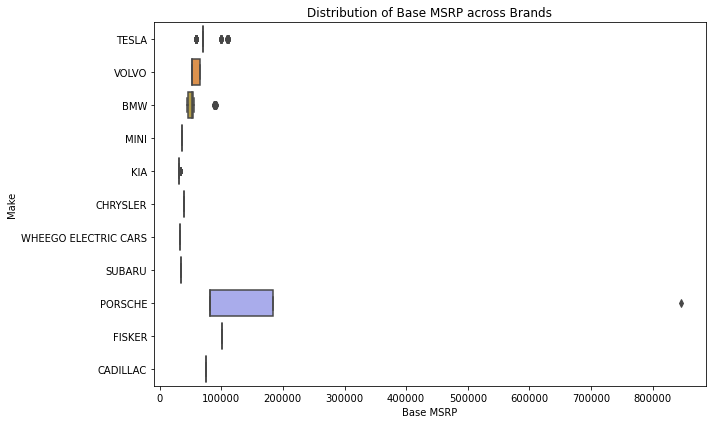

In [10]:
import scipy.stats as st


def anova_st(data, col):
    # Perform one-way ANOVA to compare mean Base MSRP across Make
    anova_results = st.f_oneway(*[data[data['Make'] == brand][col] for brand in data['Make'].unique()])
    # anova_results = st.f_oneway(*[data_v2[data_v2['Make'] == brand]['Base MSRP'] for brand in data_v2['Make'].unique()])
    print("ANOVA Results:")
    print("F-statistic:", anova_results.statistic)
    print("p-value:", anova_results.pvalue)

    if anova_results.pvalue < 0.05:
        print("There is a statistically significant difference in means across Make.")
    else:
        print("There is no statistically significant difference in means across Make.")

    # the distribution of Base MSRP across Make
    plt.figure(figsize=(10, 6))
    # data.boxplot(column='Base MSRP', by='Make', vert=False)
    sns.boxplot(x=data[col], y=data['Make'])              # origin
    # sns.boxplot(x=data_v2['Base MSRP'], y=data_v2['Make'])      # without outliers
    plt.title(f'Distribution of {col} across Brands')
    plt.xlabel(col)
    plt.ylabel('Make')
    plt.tight_layout()
    plt.show()

anova_st(data, 'Base MSRP')

ANOVA Results:
F-statistic: 21313.53184939512
p-value: 0.0
There is a statistically significant difference in means across Make.


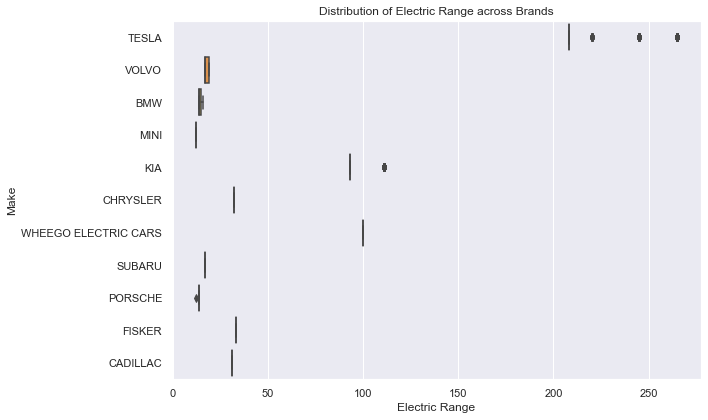

In [20]:
anova_st(data, 'Electric Range')

ANOVA Results:
F-statistic: 2188.302288188757
p-value: 0.0
There is a statistically significant difference in means across Make.


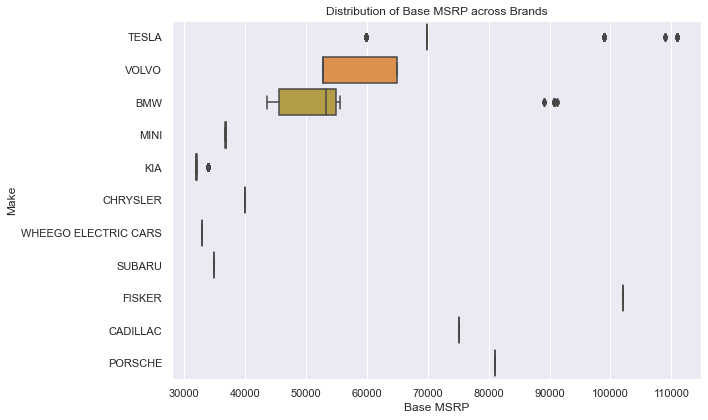

In [21]:
data_v2_anova = data[data['Base MSRP']<180000]
anova_st(data_v2_anova, 'Base MSRP')

ANOVA Results:
F-statistic: 21124.077802955675
p-value: 0.0
There is a statistically significant difference in means across Make.


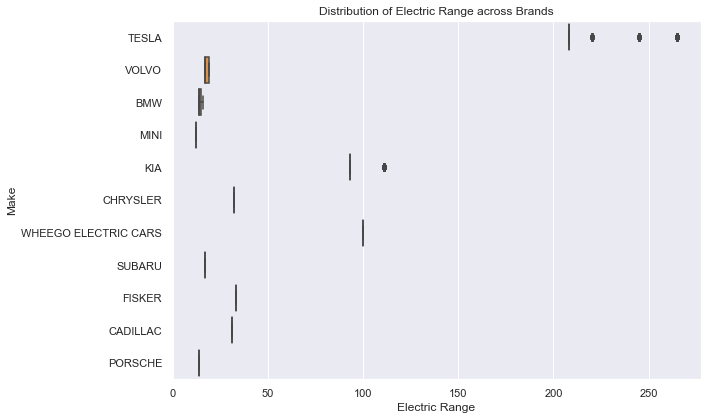

In [22]:
anova_st(data_v2_anova, 'Electric Range')

In [23]:
data_v11 = data[data['Base MSRP']<180000]

##### Cluster Analysis. KMeans

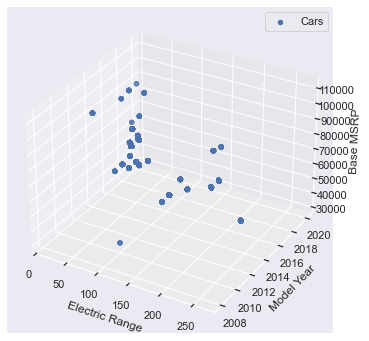

In [24]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style="darkgrid")
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_v11["Electric Range"], data_v11["Model Year"], data_v11["Base MSRP"], c='b', marker='o', label='Cars')

ax.set_xlabel('Electric Range')
ax.set_ylabel('Model Year')
ax.set_zlabel('Base MSRP')
ax.legend()
plt.show()

In [25]:
fig = px.scatter_3d(data_v11, x="Model Year", y="Base MSRP", z="Electric Range", color="Make",
                    title="3D Scatter Plot of EV").update_layout(
    template='plotly_dark',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)

fig.show()

inertia: 49.91,  accuracy: 0.81


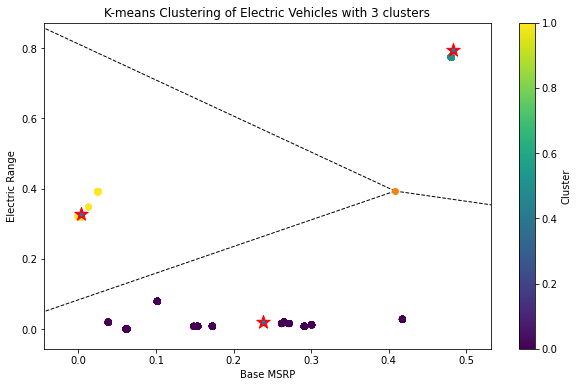

inertia: 32.05,  accuracy: 0.82


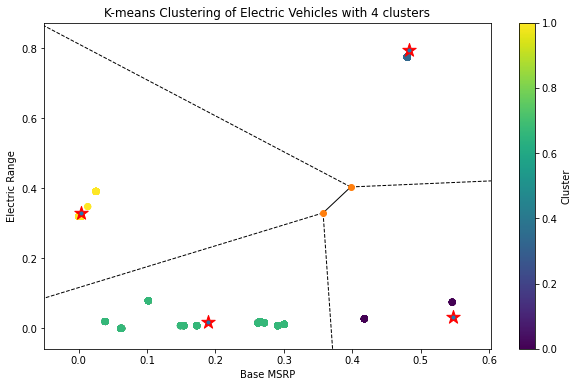

inertia: 22.11,  accuracy: 0.82
inertia: 12.90,  accuracy: 0.85
inertia: 5.11,  accuracy: 0.88
inertia: 3.37,  accuracy: 0.90
inertia: 2.36,  accuracy: 0.90
inertia: 1.78,  accuracy: 0.94


In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scipy.spatial import Voronoi, voronoi_plot_2d

data2 = data[data['Base MSRP']<180000][['Model Year', 'Base MSRP', 'Electric Range']]

# X = data[['Base MSRP', 'Electric Range']]
X = data2[['Base MSRP', 'Electric Range']]

scaler = MinMaxScaler()                           # new
# scaler = RobustScaler()                           # new
# scaler = StandardScaler()                           # new
scaled_features = scaler.fit_transform(X)    # new

# K-means clustering
def kmeans(dt, axs):
    sil = []
    for i in range(3, 11):
        num_clusters = i
        model = KMeans(n_clusters=num_clusters, random_state=42)
        data2['Cluster'] = model.fit_predict(dt)    # new

        centroids = model.cluster_centers_
        labels = model.labels_
        score = silhouette_score(dt, labels)
        sil.append(score)
        print(f"inertia: {model.inertia_:.2f},  accuracy: {score:.2f}")

        if .72<=score<.82 and i<7:
            plt.figure(figsize=(10, 6))
            # plt.scatter(data2['Base MSRP'], data2['Electric Range'], c=data2['Cluster'], cmap='viridis')
            plt.scatter(dt[:, 0], dt[:, 1], c=data2['Cluster'], cmap='viridis')
            plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red', label='Centroids')

            vor = Voronoi(centroids)
            fig = voronoi_plot_2d(vor,plt.gca())


            plt.title(f'K-means Clustering of Electric Vehicles with {i} clusters')
            plt.xlabel(axs[0])
            plt.ylabel(axs[1])
            plt.colorbar(label='Cluster')
            plt.show()
    return sil
        # print(kmeans.cluster_centers_)
mod = kmeans(scaled_features, ['Base MSRP', 'Electric Range'])

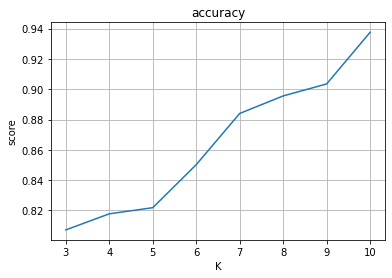

In [75]:
def accuracy_plot(sc):
    plt.plot(range(3, 11), sc)
    plt.grid()
    plt.title('accuracy')
    plt.xlabel('K')
    plt.ylabel('score')
    plt.show()
accuracy_plot(mod)

inertia: 50.11,  accuracy: 0.67
inertia: 33.51,  accuracy: 0.69
inertia: 22.85,  accuracy: 0.72
inertia: 16.17,  accuracy: 0.74


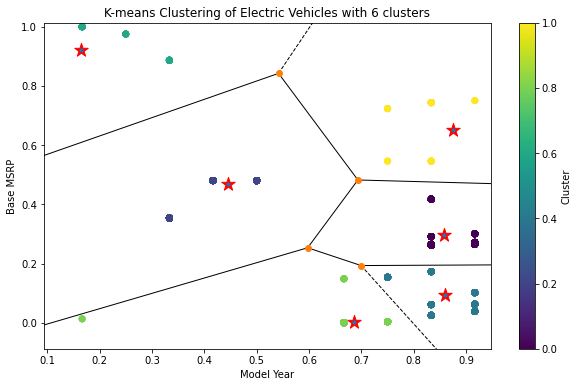

inertia: 12.51,  accuracy: 0.72
inertia: 9.71,  accuracy: 0.80
inertia: 7.13,  accuracy: 0.82
inertia: 6.10,  accuracy: 0.82


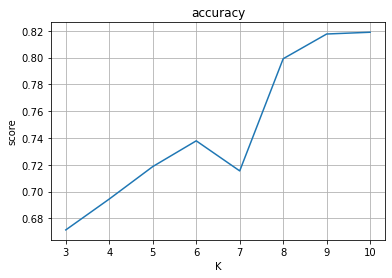

In [80]:
# Kmeans on model year and base msrp
# data3 = data[data['Base MSRP']<180000][['Model Year','Base MSRP']]
X2 = data2[['Model Year', 'Base MSRP']]
scaler = MinMaxScaler()
# scaler = StandardScaler()
scaled_f2 = scaler.fit_transform(X2)

mod2 = kmeans(scaled_f2, ['Model Year', 'Base MSRP'])
accuracy_plot(mod2)

In [104]:
# 3D Kmeans
data_3d_kmeans = data[data['Base MSRP']<180000][['Make', 'Model Year', 'Base MSRP', 'Electric Range']]
data_3d_kmeans_copy = data_3d_kmeans.copy()
X = data_3d_kmeans[['Model Year', 'Base MSRP', 'Electric Range']]

scaler = MinMaxScaler()                           # new
scaled_features_3D = scaler.fit_transform(X)    # new

# K-means clustering
def kmeans_d(dt, axs=None):
    sil = []
    for i in range(3, 11):
        num_clusters = i
        # Fit K-means clustering model
        model = KMeans(n_clusters=num_clusters, random_state=42)
        data_3d_kmeans["Cluster"] = model.fit_predict(scaled_features_3D)
        centroids = model.cluster_centers_
        labels = model.labels_

        score = silhouette_score(scaled_features_3D, labels)
        sil.append(score)
        # print(score)
        print(f"inertia: {model.inertia_:.2f},  accuracy: {score:.2f}")

        if i == 5:
            data_3d_kmeans_copy["Cluster"] = model.fit_predict(scaled_features_3D)
            data_3d_kmeans_copy['label'] = labels
            fig = px.scatter_3d(data_3d_kmeans_copy, x="Model Year", y="Electric Range", z="Base MSRP", color="Cluster",
                                title="3D Scatter Plot with K-means Clusters",
                                labels={"Model Year": "Year"}).update_layout(
                template='plotly_dark',
                plot_bgcolor='rgba(0, 0, 0, 0)',
                paper_bgcolor='rgba(0, 0, 0, 0)',
            )
            fig.show()
    return sil
sc3d = kmeans_d(scaled_features_3D)

inertia: 70.10,  accuracy: 0.76
inertia: 53.10,  accuracy: 0.77
inertia: 38.17,  accuracy: 0.77


inertia: 27.75,  accuracy: 0.76
inertia: 18.42,  accuracy: 0.75
inertia: 14.20,  accuracy: 0.76
inertia: 11.73,  accuracy: 0.82
inertia: 8.88,  accuracy: 0.83


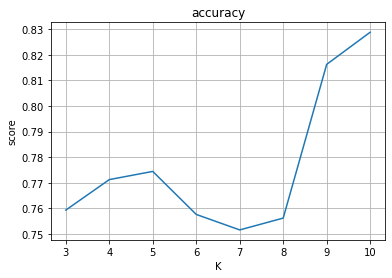

In [98]:
accuracy_plot(sc3d)

In [106]:
# data_3d_kmeans['label'].value_counts()
# cost: low, medium, high    distance: low, medium, high

lbl = {4: 'high-low', 2: 'low-low', 0: 'low-medium', 3: 'high-high', 1: 'medium-high'}
data_3d_kmeans_copy['label'] = data_3d_kmeans_copy['label'].replace(lbl)
data_3d_kmeans_copy.head()

,Make,Model Year,Base MSRP,Electric Range,Cluster,label
4,TESLA,2013,69900.0,208.0,1,medium-high
118,VOLVO,2018,52900.0,17.0,2,low-low
150,TESLA,2013,69900.0,208.0,1,medium-high
198,TESLA,2014,69900.0,208.0,1,medium-high
225,BMW,2018,45600.0,14.0,2,low-low


In [113]:
data_3d_kmeans_copy[data_3d_kmeans_copy['Cluster']==0]['Make'].value_counts()

KIA                     626
WHEEGO ELECTRIC CARS      3
Name: Make, dtype: int64

#### 3. Exploratory Data Analysis
- Box plots
- Correlation
- Time series
- Mean distributions

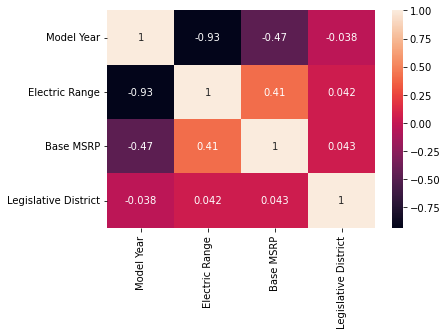

In [113]:
sns.heatmap(data.corr(), annot=True);

In [12]:
#del
def data_stats(data):
    return data.mean(), data.mode(), data.median()

sts = data_stats(data['Electric Range'])
estimates = pd.DataFrame(data={'Observation': 'Electric Range','Mean': round(sts[0], 2),
                               'Mode': sts[1][0], 'Median': sts[2]}, index=[0])

sts = data_stats(data['Base MSRP'])
estimates.loc[len(estimates)] = {'Observation': 'BaseMSRP','Mean': round(sts[0], 2),
                  'Mode': sts[1][0], 'Median': sts[2]}
estimates

,Observation,Mean,Mode,Median
0,Electric Range,123.52,208.0,93.0
1,BaseMSRP,57085.42,69900.0,59900.0


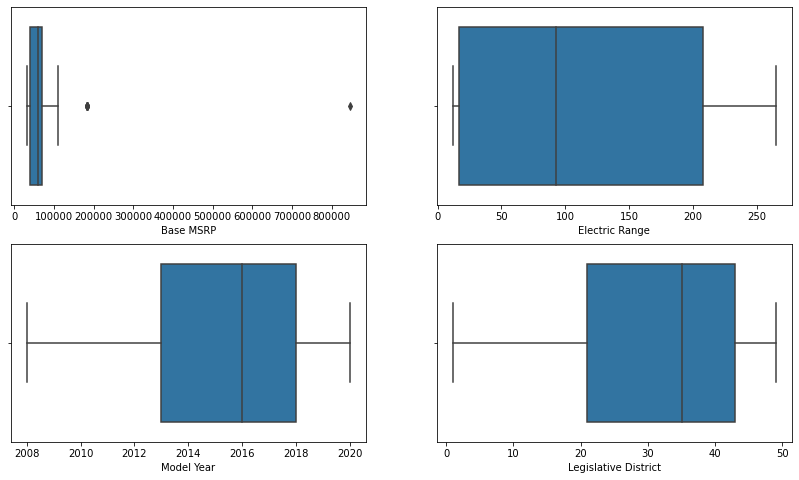

In [13]:
def box_plot(data):
    fig, ax = plt.subplots(2, 2, figsize=(14,8))
    sns.boxplot(x=data['Base MSRP'], ax=ax[0,0])
    # sns.boxplot(x=data[data['Base MSRP']<200000]['Base MSRP'], ax=ax[0,0])
    sns.boxplot(x=data['Electric Range'], ax=ax[0,1])
    sns.boxplot(x=data['Model Year'], ax=ax[1,0])
    sns.boxplot(x=data['Legislative District'], ax=ax[1,1])

box_plot(data)
plt.show()

# # plotly
# data2 = data[data['Base MSRP']<200000]  # ['Base MSRP']
# px.box(data_frame=data2, x='Base MSRP', width=800, height=250)

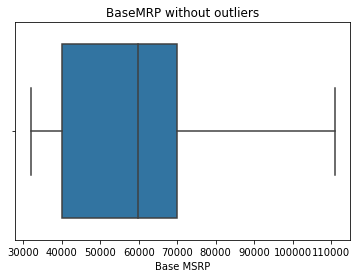

In [14]:
sns.boxplot(x=data[data['Base MSRP']<180000]['Base MSRP'])
plt.title('BaseMRP without outliers')
plt.show()

In [15]:
# data[data['Base MSRP']>800000]
data[data['Base MSRP']>180000]

,Model Year,Make,Model,Electric Range,Base MSRP,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Legislative District,Electric Utility
3810,2018,PORSCHE,PANAMERA,14.0,184400.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,43.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
7028,2018,PORSCHE,PANAMERA,14.0,184400.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22.0,PUGET SOUND ENERGY INC
17910,2018,PORSCHE,PANAMERA,14.0,184400.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17.0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...
31413,2018,PORSCHE,PANAMERA,14.0,184400.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,40.0,PUGET SOUND ENERGY INC
48667,2018,PORSCHE,PANAMERA,14.0,184400.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,41.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
57623,2015,PORSCHE,918,12.0,845000.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,48.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
65769,2018,PORSCHE,PANAMERA,14.0,184400.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17.0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...
88022,2018,PORSCHE,PANAMERA,14.0,184400.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,47.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
103994,2018,PORSCHE,PANAMERA,14.0,184400.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
113994,2018,PORSCHE,PANAMERA,14.0,184400.0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,41.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


Removing outliers by BaseMSRP

In [70]:
data_v2 = data[data['Base MSRP']<180000]

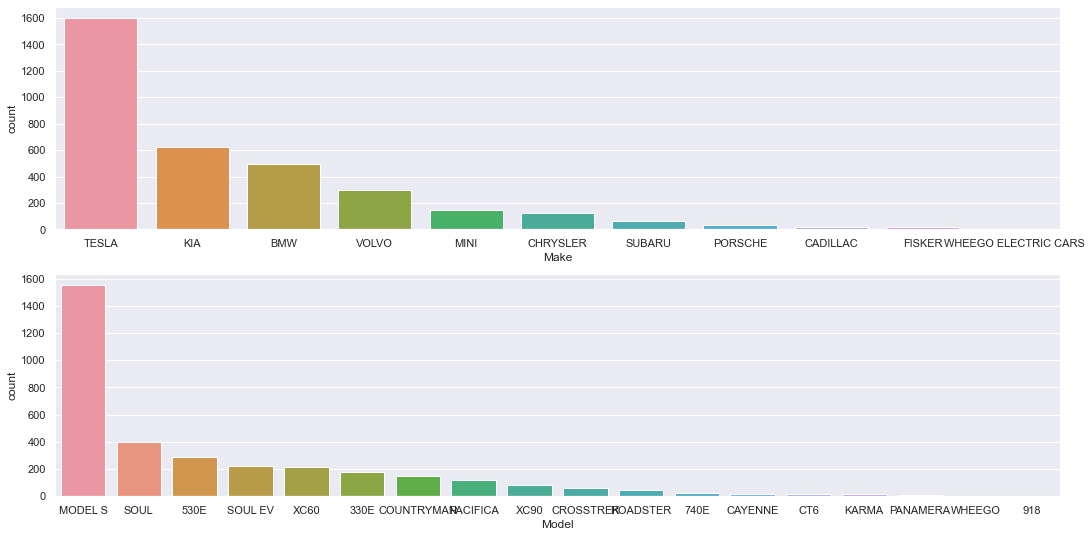

In [84]:
cat_data = data['Make'].value_counts()
cat2 = data['Model'].value_counts()
# plt.pie(x=cat_data,labels=cat_data.index, radius=2, labeldistance=1.2, autopct='%1.0f%%')
# fig = plt.figure(figsize=(18,4))
fig, ax = plt.subplots(2, 1, figsize=(18,9))
sns.barplot(x=cat_data.index, y=cat_data, ax=ax[0])
ax[0].set_xlabel('Make')
ax[0].set_ylabel('count')
sns.barplot(x=cat2.index, y=cat2, ax=ax[1])
ax[1].set_xlabel('Model')
ax[1].set_ylabel('count')
plt.show()

In [81]:
# plotly
px.bar(x=cat2.index, y=cat2, labels={'x': 'Model', 'y':'count'}).update_layout(template='plotly_dark',)
# px.bar(x=cat_data.index, y=cat_data, labels={'x': 'Make', 'y':'count'}).update_layout(template='plotly_dark',)

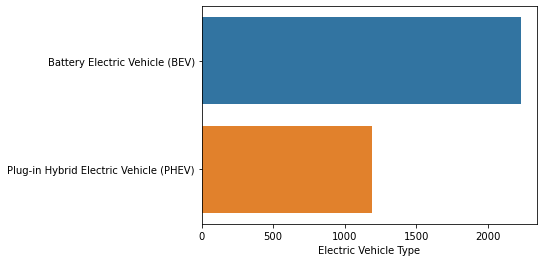

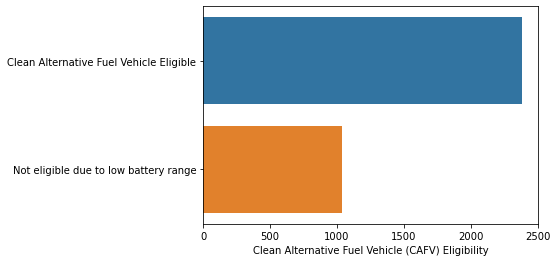

In [18]:
def plot_bar(Xdata):
    sns.barplot(x=Xdata, y=Xdata.index)
    plt.show()
plot_bar(data['Electric Vehicle Type'].value_counts())
plot_bar(data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts())

##### Correlation

In [19]:
# import scipy.stats as st

# print('(coef r, p-val)', st.pearsonr(data['Electric Range'], data['Base MSRP']))
# print('(coef r, p-val)', st.pearsonr(data['Model Year'], data['Base MSRP']))

print('(coef r, p-val)', st.pearsonr(data_v2['Electric Range'], data_v2['Base MSRP']))
print('(coef r, p-val)', st.pearsonr(data_v2['Model Year'], data_v2['Base MSRP']))

(coef r, p-val) (0.603310560936324, 0.0)
(coef r, p-val) (-0.6575996705531116, 0.0)


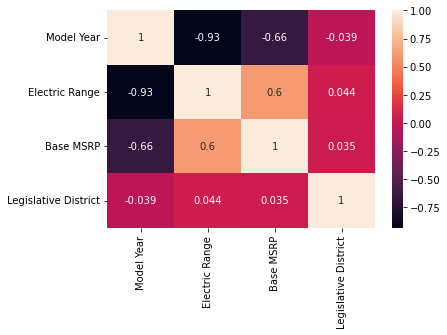

In [20]:
sns.heatmap(data_v2.corr(), annot=True,);

In [27]:
px.scatter(data_frame=data_v2, x='Model Year', y='Electric Range', color='Make', width=800, height=400).update_layout(
    template='plotly_dark',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)   # del

In [22]:
data_group = data_v2.groupby(['Make', 'Model']).mean()[['Model Year', 'Electric Range', 'Base MSRP', 'Legislative District']]
data_group['Base MSRP'] = round(data_group['Base MSRP'], 2)
data_group['Electric Range'] = round(data_group['Electric Range'], 2)
data_group['Model Year'] = round(data_group['Model Year'])
data_group['Legislative District'] = round(data_group['Legislative District'], 2)
print('Mean Values')
data_group

Mean Values


Model Year  Electric Range  Base MSRP  \
Make                 Model                                               
BMW                  330E            2017.0           14.00   44693.96   
                     530E            2018.0           14.87   54381.99   
                     740E            2018.0           14.00   90382.00   
CADILLAC             CT6             2018.0           31.00   75095.00   
CHRYSLER             PACIFICA        2019.0           32.00   39995.00   
FISKER               KARMA           2012.0           33.00  102000.00   
KIA                  SOUL            2016.0           93.00   31950.00   
                     SOUL EV         2017.0           98.89   32806.64   
MINI                 COUNTRYMAN      2019.0           12.00   36867.11   
PORSCHE              CAYENNE         2020.0           14.00   81100.00   
SUBARU               CROSSTREK       2019.0           17.00   34995.00   
TESLA                MODEL S         2013.0          212.65   69084.33   
                     ROADSTER        2009.0          234.67  105696.74   
VOLVO                XC60            2018.0           17.00   52900.00   
                     XC90            2018.0           19.00   64950.00   
WHEEGO ELECTRIC CARS WHEEGO          2010.0          100.00   32995.00   

                                 Legislative District  
Make                 Model                             
BMW                  330E                       29.45  
                     530E                       30.19  
                     740E                       29.44  
CADILLAC             CT6                        28.56  
CHRYSLER             PACIFICA                   28.66  
FISKER               KARMA                      29.93  
KIA                  SOUL                       29.78  
                     SOUL EV                    30.49  
MINI                 COUNTRYMAN                 30.68  
PORSCHE              CAYENNE                    32.33  
SUBARU               CROSSTREK                  28.57  
TESLA                MODEL S                    31.31  
                     ROADSTER                   30.20  
VOLVO                XC60                       29.99  
                     XC90                       32.48  
WHEEGO ELECTRIC CARS WHEEGO                     18.67

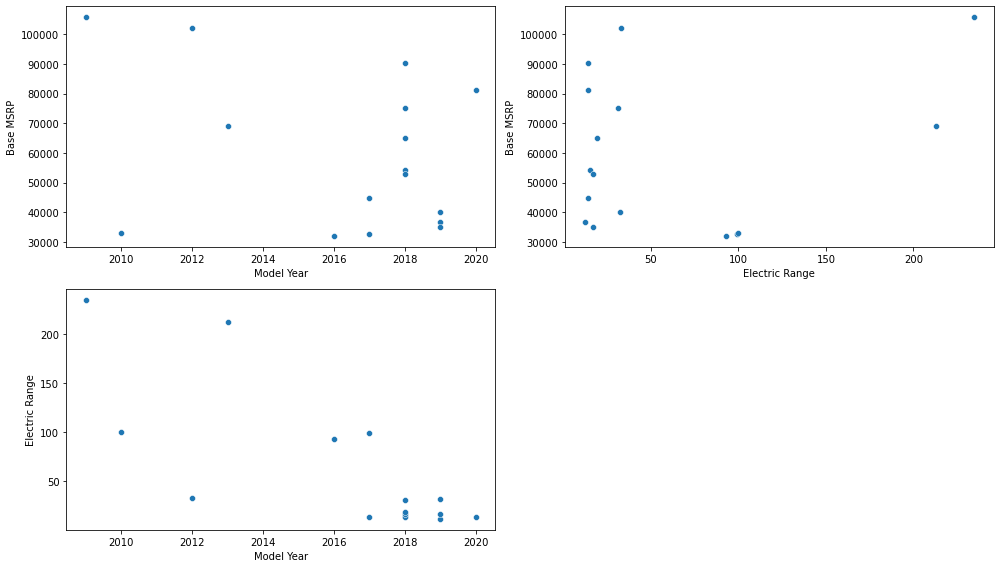

In [23]:
fig, ax = plt.subplots(2,2, figsize=(14,8))
sns.scatterplot(x=data_group['Model Year'], y=data_group['Base MSRP'], ax=ax[0,0]);
sns.scatterplot(x=data_group['Electric Range'], y=data_group['Base MSRP'], ax=ax[0,1]);
sns.scatterplot(x=data_group['Model Year'], y=data_group['Electric Range'], ax=ax[1,0]);
fig.delaxes(ax[1,1])
# sns.scatterplot(x=data_v2['Model Year'], y=data_v2['Base MSRP'], ax=ax[0]);
# sns.scatterplot(x=data_v2['Electric Range'], y=data_v2['Base MSRP'], ax=ax[1]);
plt.tight_layout()

##### Time Series

In [28]:
data_yearly = data_v2.groupby('Model Year').mean()
data_yearly

,Electric Range,Base MSRP,Legislative District
Model Year,,,
2008,220.000000,98950.000000,31.789474
2010,226.086957,100781.956522,25.956522
2011,245.000000,109000.000000,34.857143
2012,240.492958,64347.183099,33.161972
2013,208.000000,69900.000000,31.369987
2014,208.000000,69900.000000,30.818874
2016,90.885645,32264.476886,29.583942
2017,60.922179,38503.832685,30.859922
2018,26.954331,52040.133858,30.051969


In [99]:
# fig, ax = plt.subplots(2, 2, figsize=(14, 8))
#
# sns.lineplot(x=data_yearly.index, y=data_yearly['Electric Range'], ax=ax[0, 0])
# sns.lineplot(x=data_yearly.index, y=data_yearly['Base MSRP'], ax=ax[0,1])
# ax[0,0].grid()
# ax[0,1].grid()
# ax[1,0].grid()
# ax[1,1].remove()
#
# sns.lineplot(x=data_yearly.index, y=data_yearly['Electric Range'] / data_yearly['Electric Range'].max(), label='Electric Range', ax=ax[1,0])
# sns.lineplot(x=data_yearly.index, y=data_yearly['Base MSRP'] / data_yearly['Base MSRP'].max(), label='Base MSRP', ax=ax[1,0])
# ax[1,0].legend()
# ax[1,0].set_ylabel('Density')
# plt.tight_layout()
#
# plt.show()

In [36]:
yearly_stats = data_v2.groupby('Model Year').agg({'Base MSRP': 'mean', 'Electric Range': 'mean'})
px.line(x=yearly_stats.index, y=yearly_stats['Base MSRP'], markers='o',
        title='Mean Base MSRP over Years',
        labels={'x': 'Year', 'y': 'Base MSRP'}).update_layout(
    template='plotly_dark')


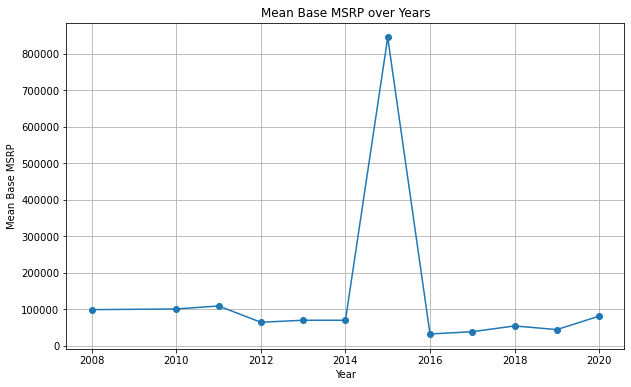

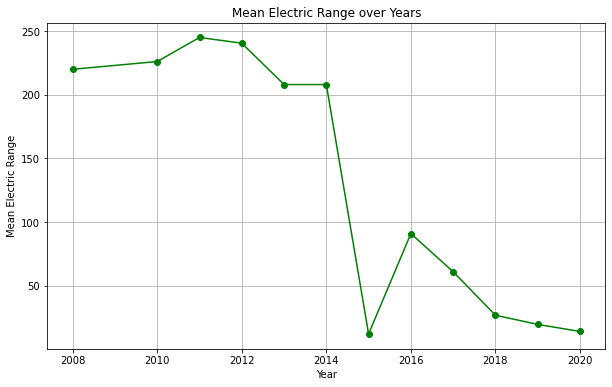

In [97]:
# with outliers
def plot_time_series(data):
    yearly_stats = data.groupby('Model Year').agg({'Base MSRP': 'mean', 'Electric Range': 'mean'})

    # time series plot for Mean "Base MSRP" over years
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_stats.index, yearly_stats['Base MSRP'], marker='o')
    plt.title('Mean Base MSRP over Years')
    plt.xlabel('Year')
    plt.ylabel('Mean Base MSRP')
    plt.grid(True)
    plt.show()
    # time series plot for Mean "Electric Range" over years
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_stats.index, yearly_stats['Electric Range'], marker='o', color='green')
    plt.title('Mean Electric Range over Years')
    plt.xlabel('Year')
    plt.ylabel('Mean Electric Range')
    plt.grid(True)
    plt.show()
plot_time_series(data)

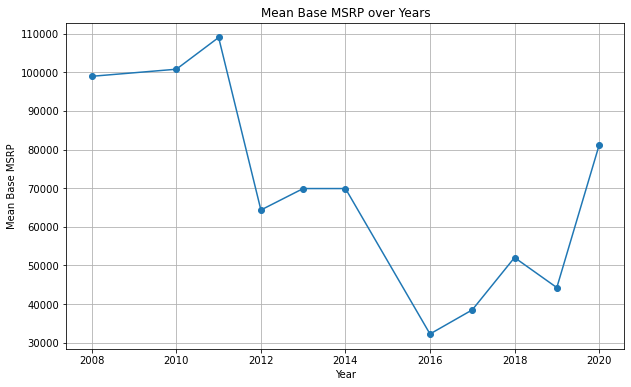

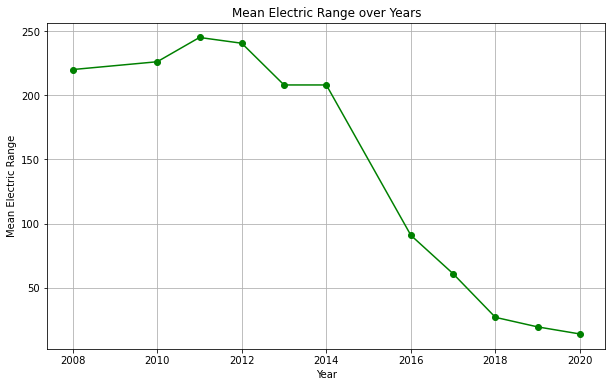

In [98]:
# TimeS without outliers
plot_time_series(data_v2)

##### ECDF distributions

In [86]:
# BASE MSRP:
models = data_v2['Make'].unique()
mu_ls = [round(data[data['Make']==name]['Base MSRP'].mean(), 2) for name in data_v2['Make'].unique()]
# var_ls = [data[data['Make']==name]['Base MSRP'].var() for name in data['Make'].unique()]
var_ls = [round(data[data['Make']==name]['Base MSRP'].var(), 2) for name in data_v2['Make'].unique()]
std_ls = [round(data[data['Make']==name]['Base MSRP'].std(), 2) for name in data_v2['Make'].unique()]
count_ls = [data[data['Make']==name].shape[0] for name in models]

year_ls = [round(data[data['Make']==name]['Model Year'].mean()) for name in data_v2['Make'].unique()]
range_ls = [round(data[data['Make']==name]['Electric Range'].mean()) for name in data_v2['Make'].unique()]
varE_ls = [round(data[data['Make']==name]['Electric Range'].var(), 2) for name in data_v2['Make'].unique()]
stdE_ls = [round(data[data['Make']==name]['Electric Range'].std(), 2) for name in data_v2['Make'].unique()]

In [87]:
stats_view = pd.DataFrame(data={'MODEL': models, 'Mean BaseMSRP': mu_ls, 'Variance BaseMSRP': var_ls, 'std BaseMSRP': std_ls, 'N': count_ls, 'Year': year_ls, 'Mean Electric Range': range_ls, 'Variance El range': varE_ls, 'std El range': stdE_ls}) # columns=['Mean', 'Variance', 'std']
stats_view

,MODEL,Mean BaseMSRP,Variance BaseMSRP,std BaseMSRP,N,Year,Mean Electric Range,Variance El range,std El range
0,TESLA,70134.97,4.559886e+07,6752.69,1603,2013,213,254.44,15.95
1,VOLVO,56354.33,2.979160e+07,5458.17,300,2018,18,0.82,0.91
2,BMW,52631.03,9.846937e+07,9923.17,493,2018,15,0.65,0.81
3,MINI,36867.11,2.222020e+03,47.14,149,2019,12,0.00,0.00
4,KIA,32259.27,3.996900e+05,632.21,626,2016,95,33.83,5.82
5,CHRYSLER,39995.00,0.000000e+00,0.00,121,2019,32,0.00,0.00
6,WHEEGO ELECTRIC CARS,32995.00,0.000000e+00,0.00,3,2010,100,0.00,0.00
7,SUBARU,34995.00,0.000000e+00,0.00,63,2019,17,0.00,0.00
8,FISKER,102000.00,0.000000e+00,0.00,15,2012,33,0.00,0.00
9,CADILLAC,75095.00,0.000000e+00,0.00,16,2018,31,0.00,0.00


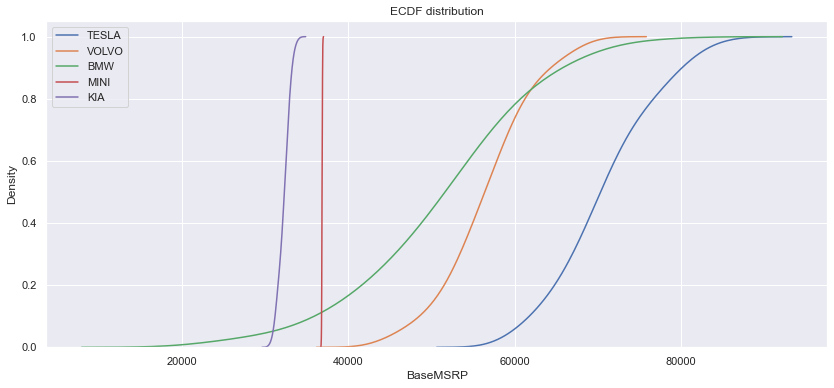

In [88]:
norm_model_ls = []
models_n = []
for model in stats_view['MODEL']:
    if int(stats_view[stats_view['MODEL']==model]['std BaseMSRP']) > 0:
        norm_model_ls.append(st.norm.rvs(loc=stats_view[stats_view['MODEL']==model]['Mean BaseMSRP'], scale=stats_view[stats_view['MODEL']==model]['std BaseMSRP'], size=100))
        models_n.append(model)

fig = plt.figure(figsize=(14,6))
for i, model in enumerate(norm_model_ls):
    if models_n[i] != 'PORSCHE':
        sns.kdeplot(x=model, cumulative=True, label=models_n[i])
    # sns.histplot(x=model, kde=True, discrete=False, common_norm=True, fill=False, label=models_n[i])
plt.legend()
plt.title('ECDF distribution')
plt.xlabel('BaseMSRP')
plt.show()

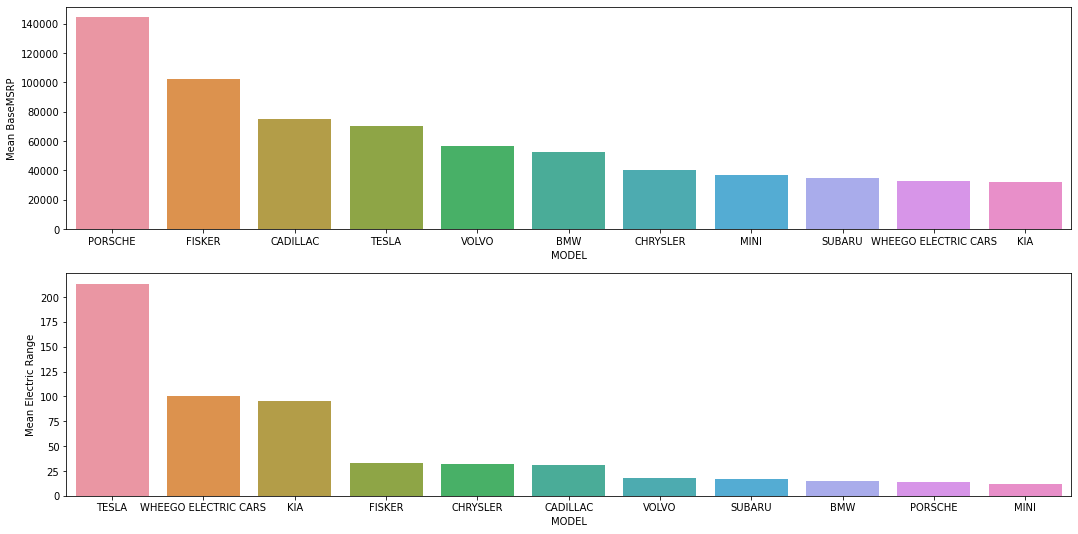

In [30]:
# Comparison of Brand Price and Range means
fig, ax = plt.subplots(2, 1, figsize=(18, 9))
sns.barplot(data=stats_view, x='MODEL', y='Mean BaseMSRP', order=stats_view.sort_values('Mean BaseMSRP', ascending=False)['MODEL'], ax=ax[0])
sns.barplot(data=stats_view, x='MODEL', y='Mean Electric Range', order=stats_view.sort_values('Mean Electric Range', ascending=False)['MODEL'], ax=ax[1])
plt.show()

In [96]:
# plotly
px.scatter(data_frame=stats_view, x='Mean Electric Range', y='Mean BaseMSRP', color='MODEL').update_layout(
    template='plotly_dark'
)

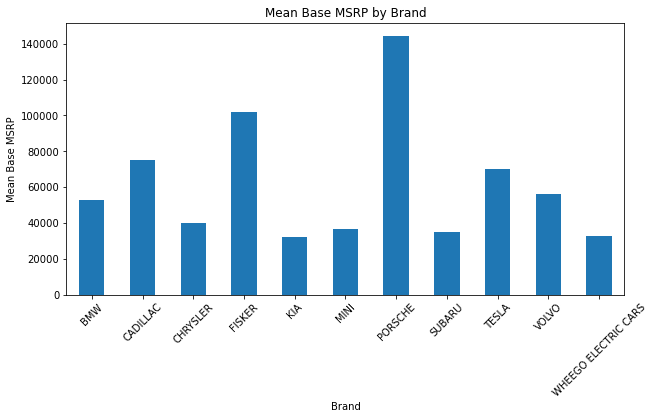

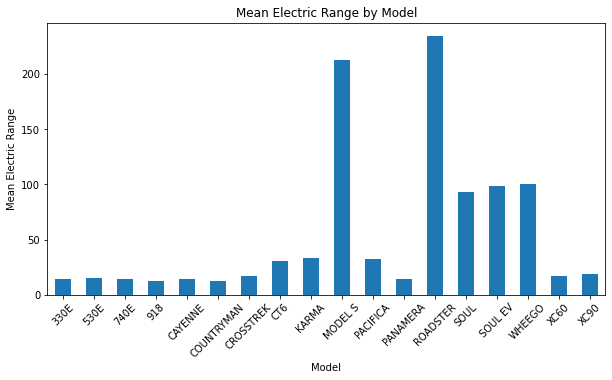

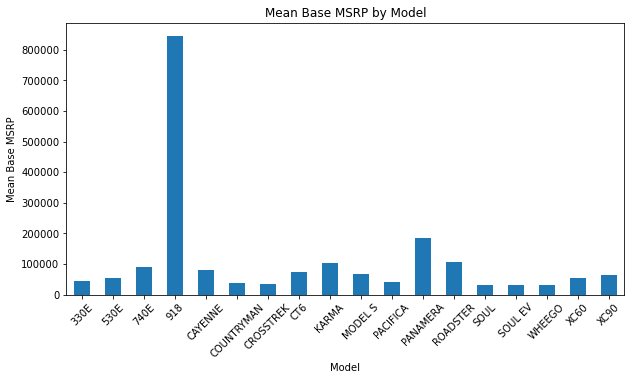

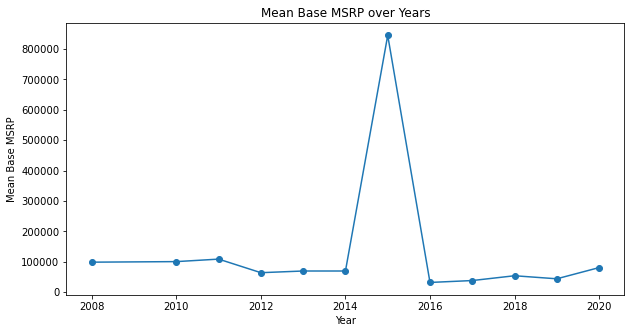

In [31]:
# plot data with outliers
def plot_mean(data):
    brand_mean_msrp = data.groupby('Make')['Base MSRP'].mean()
    plt.figure(figsize=(10,5))
    brand_mean_msrp.plot(kind='bar')
    plt.title('Mean Base MSRP by Brand')
    plt.ylabel('Mean Base MSRP')
    plt.xlabel('Brand')
    plt.xticks(rotation=45)
    plt.show()

    model_mean_range = data.groupby('Model')['Electric Range'].mean()
    plt.figure(figsize=(10,5))
    model_mean_range.plot(kind='bar')
    plt.title('Mean Electric Range by Model')
    plt.ylabel('Mean Electric Range')
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.show()

    model_mean_price = data.groupby('Model')['Base MSRP'].mean()
    plt.figure(figsize=(10,5))
    model_mean_price.plot(kind='bar')
    plt.title('Mean Base MSRP by Model')
    plt.ylabel('Mean Base MSRP')
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.show()

    year_mean_msrp = data.groupby('Model Year')['Base MSRP'].mean()
    plt.figure(figsize=(10,5))
    year_mean_msrp.plot(kind='line', marker='o')
    plt.title('Mean Base MSRP over Years')
    plt.ylabel('Mean Base MSRP')
    plt.xlabel('Year')
    plt.show()
plot_mean(data)
# plot_mean(data_v2)

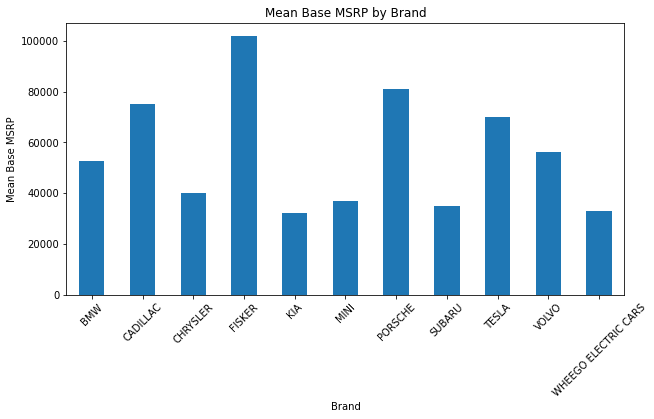

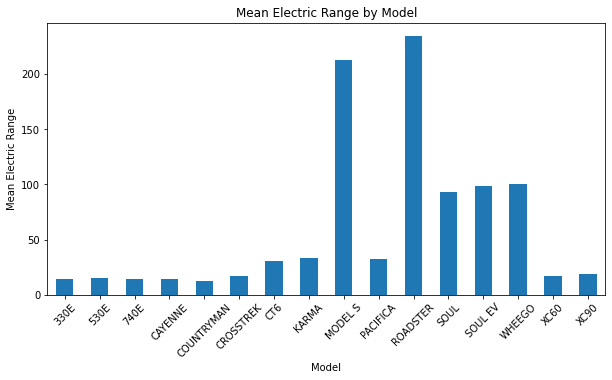

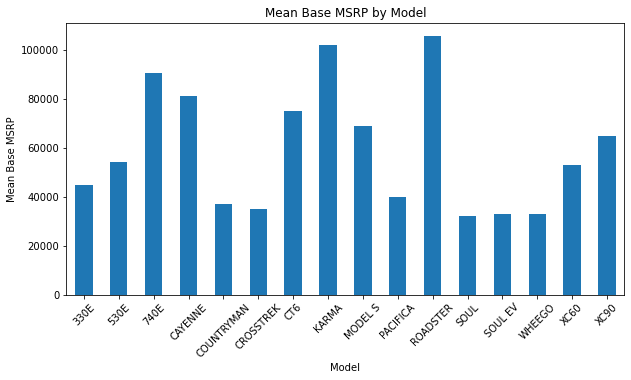

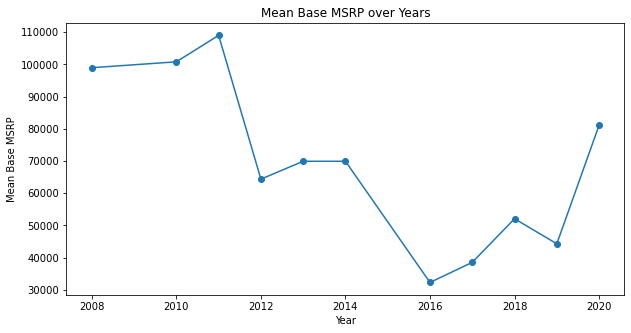

In [32]:
# plot means without outliers
plot_mean(data_v2)

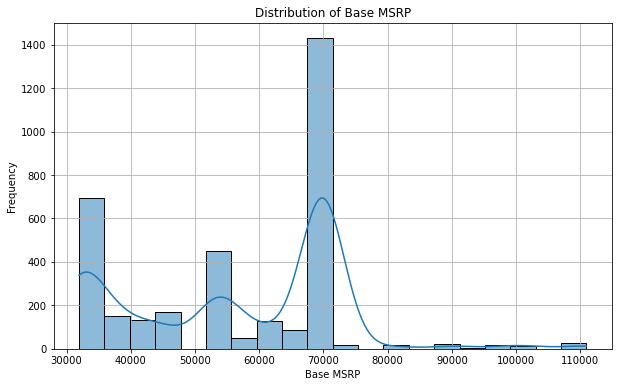

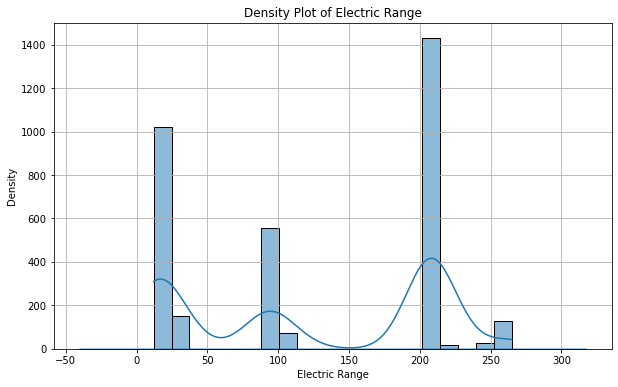

In [105]:
# del
plt.figure(figsize=(10, 6))
sns.histplot(data_v2['Base MSRP'], bins=20, kde=True)
plt.title('Distribution of Base MSRP')
plt.xlabel('Base MSRP')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data_v2['Electric Range'], shade=True)
sns.histplot(data_v2['Electric Range'], bins=20, kde=True)
plt.title('Density Plot of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Density')
plt.grid(True)
plt.show()

## 4. Regression Analysis    (del: SVR, ridge)
- Polynomial Regression
- SVR
- Ridge
- Random Forest Regression
## 4.b Decision Tree

Mean Squared Error: 145805795.63968056
R-squared Score: 0.5911985325164516


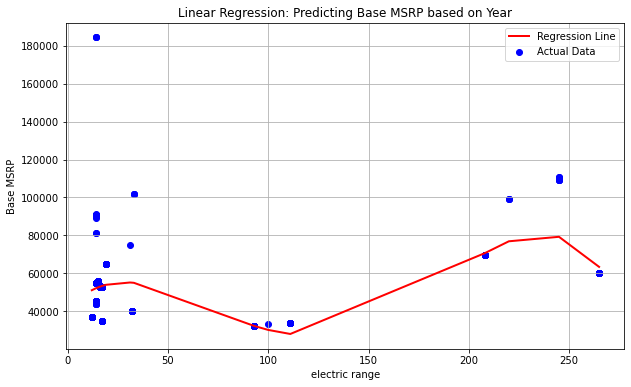

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.optimize import curve_fit


X = data[['Electric Range']]
y = data['Base MSRP']
# X = data_v2[['Model Year']]
# y = data_v2['Base MSRP']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# new. NonLinear
# Create a Polynomial Regression model with a fixed degree
degree = 4  # Choose a specific degree
polyreg = PolynomialFeatures(degree)
X_poly = polyreg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

# Predict using the trained model
y_pred = regressor.predict(polyreg.transform(X_test))
# Sort the test data for smoother visualization
# sorted_idx = X_test.argsort(axis=0)
# Xtest_sorted = X_test[sorted_idx]
# y_pred_sorted = y_pred[sorted_idx]
mse = mean_squared_error(y_test, y_pred)

# # Linear regression model
# model = LinearRegression()
# # Fit the model to the training data
# model.fit(X_train, y_train)
# # Make predictions on the test data
# y_pred = model.predict(X_test)
# # Mean Absolute Error (MAE)
# mae = mean_absolute_error(y_test, y_pred)
# print("Mean Absolute Error:", mae)
# # Mean Squared Error (MSE)
# mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

# plt.scatter(Xtrain, Ytrain, color='blue', label='Training Data')
# plt.plot(Xtest_sorted, Y_pred_sorted, color='red', linewidth=2, label='Polynomial Regression')
# plt.xlabel('Model Year')
# plt.ylabel('Base MSRP')
# plt.legend()
# plt.show()
# Plot the regression line and the actual data points

df_101 = pd.DataFrame(data=X_test.copy())
df_101['BaseMSRP'] = y_pred.copy()
# my_data = df_101.groupby('Model Year').mean()
my_data = df_101.groupby('Electric Range').mean()
# my_data


plt.figure(figsize=(10, 6))
# plt.scatter(X_test['Model Year'], y_test, color='blue', label='Actual Data')
plt.scatter(X_test['Electric Range'], y_test, color='blue', label='Actual Data')
plt.plot(my_data.index, my_data['BaseMSRP'], color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Predicting Base MSRP based on Year')
# plt.xlabel('Model Year')
plt.xlabel('electric range')
plt.ylabel('Base MSRP')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# polyreg.transform(X_test)
# y_pred[0], y_test.iloc[0]
# X_test = X_test['Model Year']
X_test.head()
# help(train_test_split)
# P A U S E D

,Electric Range
75008,32.0
118199,208.0
6839,208.0
129061,208.0
45177,208.0


MSE: 332412507.44251704
R-squared Score: 0.06800192505239


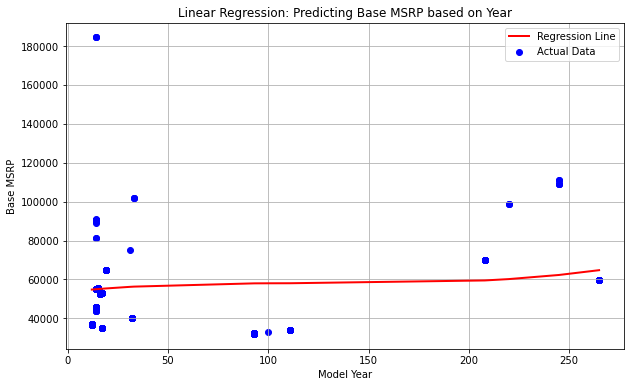

In [38]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# X_test = X_test['Model Year']
# Standardize the features
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(X_train)
Xtest_scaled = scaler.transform(X_test)

# Create an SVR model
svr = SVR(kernel='poly', degree=3, C=1., )  # You can choose different kernels (e.g., 'linear', 'poly', 'rbf')
# Fit the model to your training data
svr.fit(Xtrain_scaled, y_train)
# Make predictions
y_pred = svr.predict(Xtest_scaled)
# Evaluate the model
# print(f"SVR score: {svr.score(y_test, y_pred)}")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)
# print(svr.score(y_test, y_pred.reshape(-1, 1)))

df_101 = pd.DataFrame(data=X_test.copy())
df_101['BaseMSRP'] = y_pred
# my_data = df_101.groupby('Model Year').mean()
my_data = df_101.groupby('Electric Range').mean()

plt.figure(figsize=(10, 6))
# plt.scatter(X_test['Model Year'], y_test, color='blue', label='Actual Data')
plt.scatter(X_test['Electric Range'], y_test, color='blue', label='Actual Data')
plt.plot(my_data.index, my_data['BaseMSRP'], color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Predicting Base MSRP based on Year')
plt.xlabel('Model Year')
plt.ylabel('Base MSRP')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# display(X_test.head())
# display(X_train.head())
# help(LinearRegression)
# print(f"SVR score: {svr.score(y_test, y_pred)}")
# print(svr.score(y_test, y_pred.reshape(1, -1)))

# svr.get_params()
# svr.dual_coef_
# svr.intercept_

Mean Absolute Error: 10616.261418400052
Mean Squared Error: 267381143.8024091
R-squared Score: 0.25033292754717273


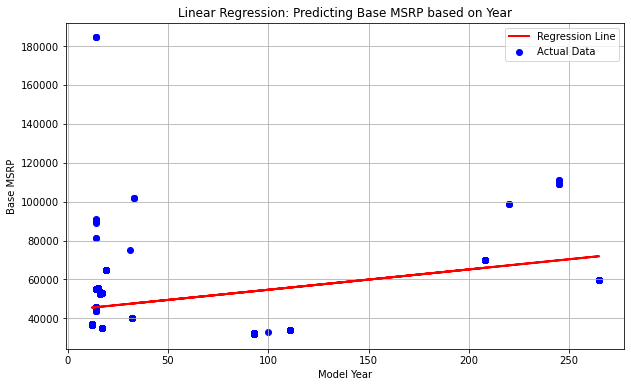

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

# Create a pipeline with feature scaling and Ridge regression
model = make_pipeline(StandardScaler(), Ridge(alpha=0.1, ))  # <-- adjust alpha as needed    solver='saga'
# solver : {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'}

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


plt.figure(figsize=(10, 6))
# plt.scatter(X_test['Model Year'], y_test, color='blue', label='Actual Data')
plt.scatter(X_test['Electric Range'], y_test, color='blue', label='Actual Data')
# plt.plot(X_test['Model Year'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.plot(X_test['Electric Range'], y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Predicting Base MSRP based on Year')
plt.xlabel('Model Year')
plt.ylabel('Base MSRP')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
help(Ridge)

Help on class Ridge in module sklearn.linear_model._ridge:

class Ridge(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, _BaseRidge)
 |  Ridge(alpha=1.0, *, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
 |  
 |  Linear least squares with l2 regularization.
 |  
 |  Minimizes the objective function::
 |  
 |  ||y - Xw||^2_2 + alpha * ||w||^2_2
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape (n_samples, n_targets)).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, ndarray of shape (n_targets,)}, default=1.0
 |      Regularization strength; must be a positive float. Regul

MSE: 143829668.53885043
R-2: 0.5967390781114275


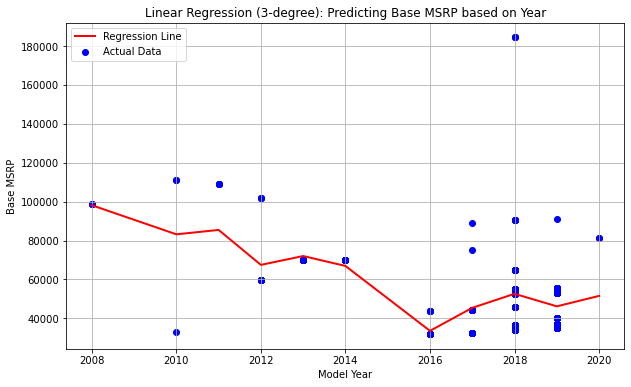

MSE: 144675940.12586075
R-2: 0.5943663530414693


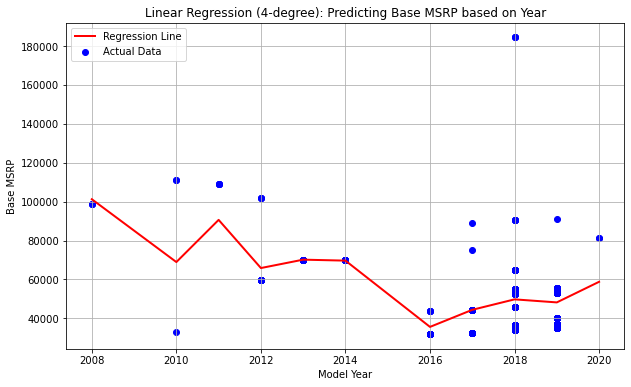

MSE: 178973253.18195835
R-2: 0.49820562193634965


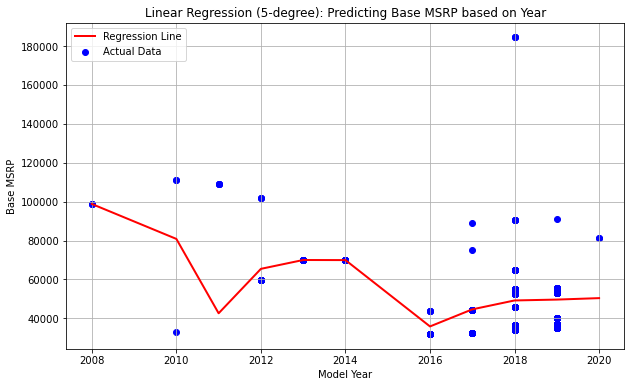

In [42]:
# Multivariable Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
X = data[['Model Year', 'Electric Range']]
y = data['Base MSRP']
# X = data_v2[['Model Year']]
# y = data_v2['Base MSRP']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def mult_reg(X_train, X_test, y_train, y_test, n):
    # Create a Polynomial Regression model
    degree = n  # You can choose the degree of the polynomial
    polyreg = PolynomialFeatures(degree)
    X_poly = polyreg.fit_transform(X_train)
    regressor = LinearRegression()
    regressor.fit(X_poly, y_train)

    # Make predictions on the test set
    X_test_poly = polyreg.transform(X_test)
    y_pred = regressor.predict(X_test_poly)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE: {mse}")
    print(f"R-2: {r2}")


    df_101 = pd.DataFrame(data=X_test.copy())
    df_101['BaseMSRP'] = y_pred.copy()
    my_data = df_101.groupby('Model Year').mean()
    # my_data = df_101.groupby('Electric Range').mean()


    plt.figure(figsize=(10, 6))
    plt.scatter(X_test['Model Year'], y_test, color='blue', label='Actual Data')
    # plt.scatter(X_test['Electric Range'], y_test, color='blue', label='Actual Data')
    plt.plot(my_data.index, my_data['BaseMSRP'], color='red', linewidth=2, label='Regression Line')
    # plt.plot(my_data.index, my_data['BaseMSRP'], color='red', linewidth=2, label='Regression Line')
    plt.title(f'Linear Regression ({i}-degree): Predicting Base MSRP based on Year')
    plt.xlabel('Model Year')
    plt.ylabel('Base MSRP')
    plt.legend()
    plt.grid(True)
    plt.show()

for i in range(3, 6):
    mult_reg(X_train, X_test, y_train, y_test, i)

#### Random Forest Regression

Mean Squared Error: 86397841.06948309
R-2: 0.757762960918935


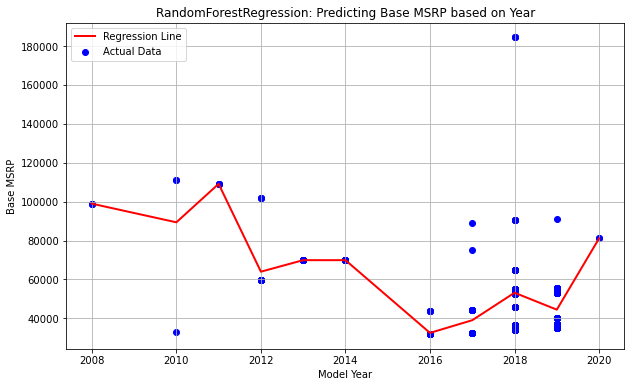

In [50]:
# RANDOM FOREST REGRESSION
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
# Fit the model to the training data
rf_regressor.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print(f"R-2: {r2}")


# # Scatter plot of actual vs. predicted values
# plt.scatter(y_test, y_pred, color='blue')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Actual vs. Predicted Values')
# # Add a diagonal line for reference (perfect predictions)
# x = np.linspace(min(y_test), max(y_test), 100)
# plt.plot(x, x, color='red', linestyle='--')
# plt.show()

df_101 = pd.DataFrame(data=X_test.copy())
df_101['BaseMSRP'] = y_pred.copy()
my_data = df_101.groupby('Model Year').mean()

plt.figure(figsize=(10, 6))
plt.scatter(X_test['Model Year'], y_test, color='blue', label='Actual Data')
# plt.scatter(X_test['Electric Range'], y_test, color='blue', label='Actual Data')
plt.plot(my_data.index, my_data['BaseMSRP'], color='red', linewidth=2, label='Regression Line')
# plt.plot(my_data.index, my_data['BaseMSRP'], color='red', linewidth=2, label='Regression Line')
plt.title('RandomForestRegression: Predicting Base MSRP based on Year')
plt.xlabel('Model Year')
plt.ylabel('Base MSRP')
plt.legend()
plt.grid(True)
plt.show()


#### Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=9, min_samples_split=2, criterion='gini', random_state=42)    # {“gini”, “entropy”, “log_loss”}
# Fit the model to the training data
dt_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred,)
print("Accuracy:", accuracy)
# Other classification metrics
print(classification_report(y_test, y_pred, zero_division=.0))
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9546783625730995
              precision    recall  f1-score   support

     31950.0       1.00      1.00      1.00        81
     32250.0       1.00      1.00      1.00        30
     32995.0       1.00      1.00      1.00         1
     33950.0       1.00      1.00      1.00        15
     34995.0       0.00      0.00      0.00         9
     36800.0       1.00      1.00      1.00        12
     36900.0       1.00      1.00      1.00        17
     39995.0       1.00      1.00      1.00        30
     43700.0       1.00      1.00      1.00         4
     44100.0       0.95      1.00      0.98        20
     45600.0       0.00      0.00      0.00        13
     52650.0       1.00      1.00      1.00         7
     52900.0       0.82      1.00      0.90        42
     53400.0       1.00      1.00      1.00        12
     54950.0       0.59      1.00      0.74        30
     55700.0       1.00      1.00      1.00         8
     59900.0       1.00      1.00      1.00        2

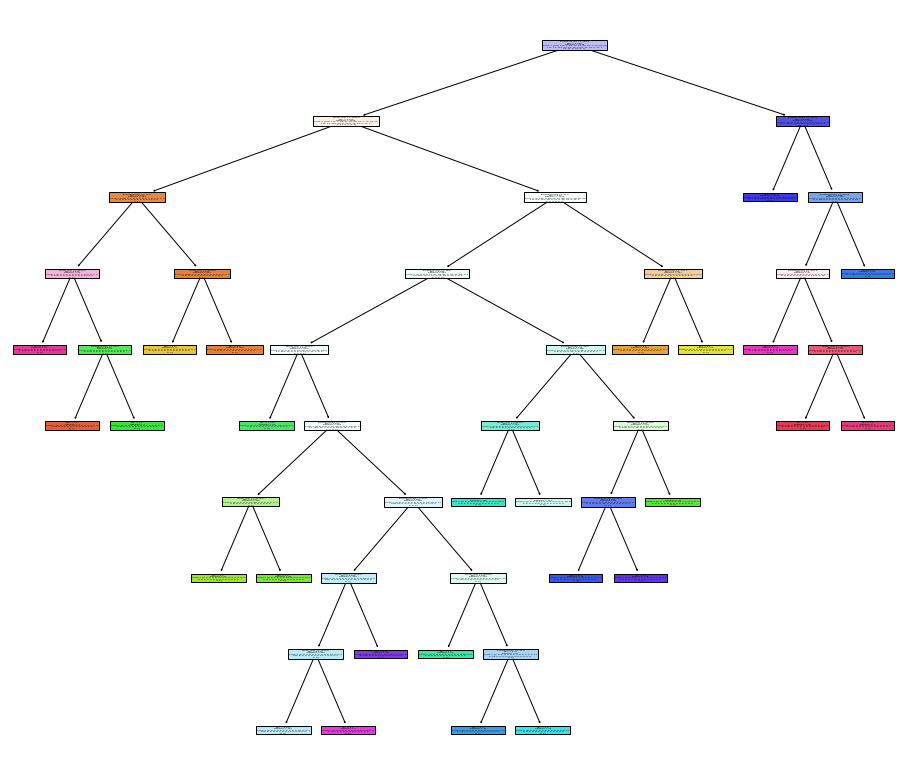

In [66]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16, 14))
plot_tree(dt_classifier, filled=True, feature_names=X.columns)
plt.show()

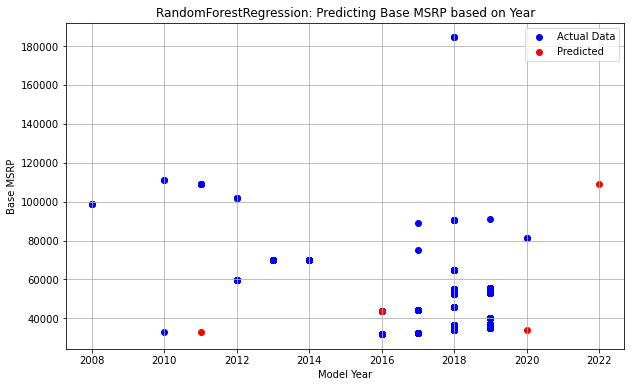

In [86]:
# dt_classifier.feature_importances_  # [0: Model Year, 1: Electric Range]
# dt_classifier.n_classes_
predictions = dt_classifier.predict([[2011, 92], [2020, 120], [2016, 50], [2022, 250]],)

plt.figure(figsize=(10, 6))
plt.scatter(X_test['Model Year'], y_test, color='blue', label='Actual Data')
# plt.scatter(my_dataX_test['Electric Range'], y_test, color='blue', label='Actual Data')
plt.scatter([2011, 2020, 2016, 2022], predictions, color='red', label='Predicted')
# plt.plot(my_data.index, my_data['BaseMSRP'], color='red', linewidth=2, label='Regression Line')
plt.title('RandomForestRegression: Predicting Base MSRP based on Year')
plt.xlabel('Model Year')
plt.ylabel('Base MSRP')
plt.legend()
plt.grid(True)
plt.show()

### Conclusion.